# Heart Disease UCI

Datasets:Heart Disease UCI , 
Obtained from :https://archive.ics.uci.edu/ml/datasets/Heart+Disease 

This database has been reduced from 76 attributes to 14 essential attributes because all the published experiments have refered so. The "goal" field refers to the presence of heart disease in the patient. It is denoted by 0(absense) or 1(presence)

The data is saved in a csv file. 


In [90]:
import numpy as np
import pandas as pd
data=pd.read_csv("/Users/Tanya/Downloads/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The data contanis follwing variables:
> 1. age : age in years
> 2. sex : (1 = male; 0 = female)
> 3. cp : chest pain type (4 values) 
> 4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
> 5. chol : serum cholestoral in mg/dl
> 6. fbs : fasting blood sugar > 120 mg/dl
> 7. restecg : resting electrocardiographic results (values 0,1,2)
> 8. thalach : maximum heart rate achieved 
> 9. exang : exercise induced angina 
> 10. oldpeak : ST depression induced by exercise relative to rest 
> 11. slope : the slope of the peak exercise ST segment 
> 12. ca : number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
> 14. target :0(absense) ,1(presence)

In [79]:
data.shape

(303, 14)

The dataset contanis 303 rows(observation) and 14 columns(variables)

The categorical data is already present as numbers 

Let us check the variables and see if they have any relationship

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


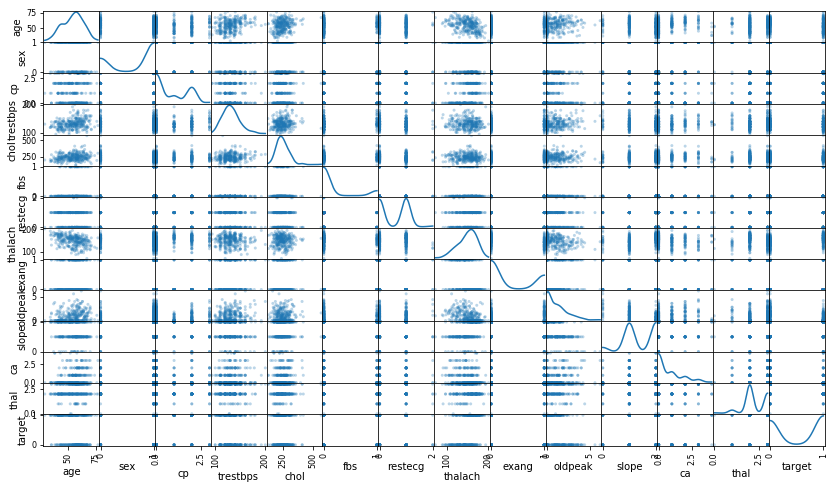

In [80]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

The variables don't seem to be related

Now lets break the data into features(X) and target(y)

In [81]:
X=data.iloc[:, :13].values
y=data.iloc[:, 13:14].values


We will now split the data using sklearn.model_selection.train_test_split such that we use 25% of our data for the testing purpose and 75% of the data for our training purpose

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

Since we have to detect whether a person is suffering from heart disease or not it's more dangerous if the person is actually suffering from a heart disease and the machine detects it as negative.So we need to obtain a high recall value.

Now we will use 3 supervised learning model and check which one produces a better recall
>1.AdaBoostClassifier
>2.DecisionTreeClassifier
>3.LogisticRegression

Using sklearn.ensemble.AdaBoostClassifier train the dataset and check its recall

In [83]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=120)
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
cm=confusion_matrix(y_test, pred)
rec=cm[0][0]/(cm[0][0]+cm[0][1])
print("Test set accuracy for AdaBoostClassifier is: {:.4f}".format(rec))

Test set accuracy for AdaBoostClassifier is: 0.8000


Using sklearn.ensemble.DecisionTreeClassifier train the dataset and check its recall

In [85]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

In [86]:

cm=confusion_matrix(y_test, pred)
rec=cm[0][0]/(cm[0][0]+cm[0][1])
print("Test set accuracy for DecisionTreeClassifier is: {:.4f}".format(rec))

Test set accuracy for DecisionTreeClassifier is: 0.8000


Using sklearn.linear_model.LogisticRegression train the dataset and check its recall

In [87]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:

cm=confusion_matrix(y_test, pred)
rec=cm[0][0]/(cm[0][0]+cm[0][1])
print("Test set accuracy for LogisticRegression is: {:.4f}".format(rec))

Test set accuracy for LogisticRegression is: 0.6857


AdaBoostClassifier and DecisionTreeClassifier has a recall value of 0.8 which is the highest .So, they have prooved to be the best model for solving this dataset.